# Lab Assignment – Decision Tree Classifier

Build a Decision Tree Classifier to predict

## 1) Whether a person buys a computer based on demographic attributes (Age, Income, Student Status, Credit Rating) from Dataset-1.

####  1. Import Libraries

In [20]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt

####  2. Create the Dataset

In [4]:
data = {
    'Age': ['<=30','<=30','31...40','>40','>40','>40','31...40','<=30','<=30','>40',
            '<=30','31...40','31...40','>40'],
    'Income': ['High','High','High','Medium','Low','Low','Low','Medium','Low','Medium',
               'Medium','Medium','High','Medium'],
    'Student': ['No','No','No','No','Yes','Yes','Yes','No','Yes','Yes','Yes','No','Yes','No'],
    'Credit_rating': ['Fair','Excellent','Fair','Fair','Fair','Excellent','Excellent',
                      'Fair','Fair','Fair','Excellent','Excellent','Fair','Excellent'],
    'Buys_computer': ['No','No','Yes','Yes','Yes','No','Yes','No','Yes','Yes','Yes','Yes','Yes','No']
}

In [5]:
df = pd.DataFrame(data)
print(df)

        Age  Income Student Credit_rating Buys_computer
0      <=30    High      No          Fair            No
1      <=30    High      No     Excellent            No
2   31...40    High      No          Fair           Yes
3       >40  Medium      No          Fair           Yes
4       >40     Low     Yes          Fair           Yes
5       >40     Low     Yes     Excellent            No
6   31...40     Low     Yes     Excellent           Yes
7      <=30  Medium      No          Fair            No
8      <=30     Low     Yes          Fair           Yes
9       >40  Medium     Yes          Fair           Yes
10     <=30  Medium     Yes     Excellent           Yes
11  31...40  Medium      No     Excellent           Yes
12  31...40    High     Yes          Fair           Yes
13      >40  Medium      No     Excellent            No


#### 3. Encode Categorical Data

In [6]:
le = LabelEncoder()
for col in df.columns:
    df[col] = le.fit_transform(df[col])

####  4. Split Features & Target

In [7]:
X = df.drop('Buys_computer', axis=1)
y = df['Buys_computer']

#### 5. Train the Decision Tree Classifier

In [8]:
clf = DecisionTreeClassifier(criterion="entropy", random_state=42)
clf.fit(X, y)

DecisionTreeClassifier(criterion='entropy', random_state=42)

#### 6. Visualize the Decision Tree

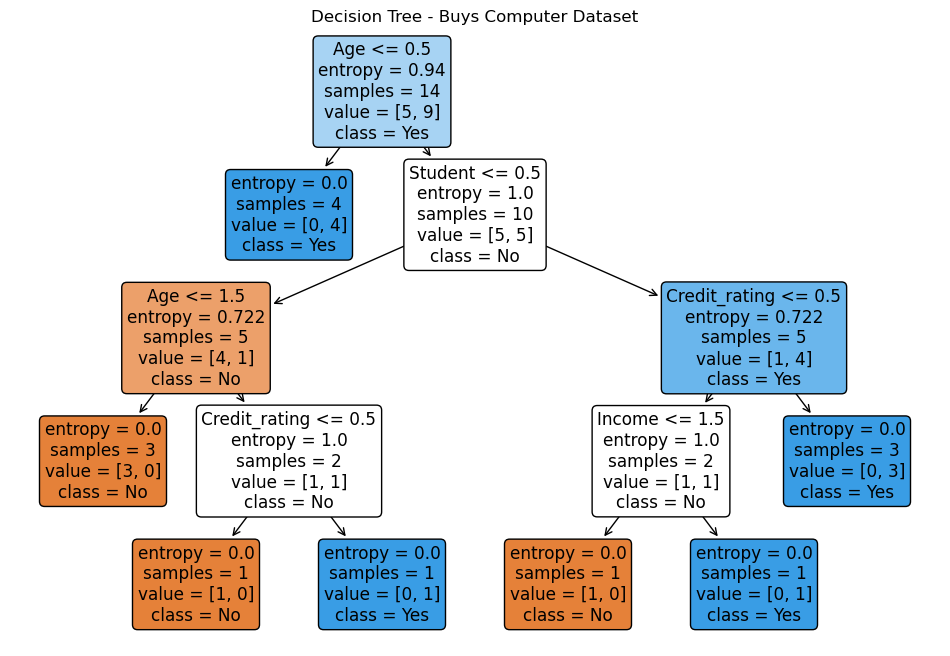

In [9]:
plt.figure(figsize=(12,8))
plot_tree(clf, feature_names=['Age','Income','Student','Credit_rating'],
          class_names=['No','Yes'], filled=True, rounded=True)
plt.title("Decision Tree - Buys Computer Dataset")
plt.show()

#### 7. Make Predictions

In [ ]:
y_pred = clf.predict(X) 

In [12]:
results = pd.DataFrame({
    "Age": data["Age"],
    "Income": data["Income"],
    "Student": data["Student"],
    "Credit_rating": data["Credit_rating"],
    "Actual": ["No" if val==0 else "Yes" for val in y],
    "Predicted": ["No" if val==0 else "Yes" for val in y_pred]
})
print("\nPredicted Results:")
print(results)



Predicted Results:
        Age  Income Student Credit_rating Actual Predicted
0      <=30    High      No          Fair     No        No
1      <=30    High      No     Excellent     No        No
2   31...40    High      No          Fair    Yes       Yes
3       >40  Medium      No          Fair    Yes       Yes
4       >40     Low     Yes          Fair    Yes       Yes
5       >40     Low     Yes     Excellent     No        No
6   31...40     Low     Yes     Excellent    Yes       Yes
7      <=30  Medium      No          Fair     No        No
8      <=30     Low     Yes          Fair    Yes       Yes
9       >40  Medium     Yes          Fair    Yes       Yes
10     <=30  Medium     Yes     Excellent    Yes       Yes
11  31...40  Medium      No     Excellent    Yes       Yes
12  31...40    High     Yes          Fair    Yes       Yes
13      >40  Medium      No     Excellent     No        No


#### 8. Evaluate Model Accuracy

In [11]:
print("Accuracy:", accuracy_score(y, y_pred))
print("\nClassification Report:\n", classification_report(y, y_pred, target_names=['No','Yes']))

Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

          No       1.00      1.00      1.00         5
         Yes       1.00      1.00      1.00         9

    accuracy                           1.00        14
   macro avg       1.00      1.00      1.00        14
weighted avg       1.00      1.00      1.00        14



## 2) Calculation of Gini Index, Entropy and Classification Errors for tree nodes using Dataset-2.

In [13]:
data2 = {
    "CustomerID": list(range(1,51)),
    "Gender": ["Male","Female","Male","Female","Male","Female","Male","Female","Male","Female",
               "Male","Female","Male","Female","Male","Female","Male","Female","Male","Female",
               "Male","Female","Male","Female","Male","Female","Male","Female","Male","Female",
               "Male","Female","Male","Female","Male","Female","Male","Female","Male","Female",
               "Male","Female","Male","Female","Male","Female","Male","Female","Male","Female"],
    "CarType": ["Sedan","Hatchback","SUV","Sedan","Hatchback","SUV","Sedan","Hatchback","SUV","Sedan",
                "Hatchback","SUV","Sedan","Hatchback","SUV","Sedan","Hatchback","SUV","Sedan","Hatchback",
                "SUV","Sedan","Hatchback","SUV","Sedan","Hatchback","SUV","Sedan","Hatchback","SUV",
                "Sedan","Hatchback","SUV","Sedan","Hatchback","SUV","Sedan","Hatchback","SUV","Sedan",
                "Hatchback","SUV","Sedan","Hatchback","SUV","Sedan","Hatchback","SUV","Sedan","Hatchback"],
    "ShirtSize": ["M","L","XL","S","M","L","XL","S","M","L",
                  "XL","S","M","L","XL","S","M","L","XL","S",
                  "M","L","XL","S","M","L","XL","S","M","L",
                  "XL","S","M","L","XL","S","M","L","XL","S",
                  "M","L","XL","S","M","L","XL","S","M","L"],
    "Class": ["C0","C1","C0","C1","C1","C0","C1","C0","C1","C0",
              "C0","C1","C1","C0","C0","C1","C1","C0","C1","C0",
              "C0","C1","C1","C0","C1","C0","C1","C0","C0","C1",
              "C0","C1","C1","C0","C1","C0","C0","C1","C0","C1",
              "C1","C0","C1","C0","C0","C1","C1","C0","C1","C0"]
}

In [14]:
df2 = pd.DataFrame(data2)

In [15]:
def entropy(y):
    classes = y.value_counts(normalize=True)
    return -sum(p*np.log2(p) for p in classes if p > 0)

In [16]:
def gini(y):
    classes = y.value_counts(normalize=True)
    return 1 - sum(p**2 for p in classes)

In [17]:
def classification_error(y):
    classes = y.value_counts(normalize=True)
    return 1 - classes.max()

In [18]:
def impurity_measures(y):
    return {
        "Entropy": round(entropy(y), 3),
        "Gini": round(gini(y), 3),
        "Classification Error": round(classification_error(y), 3)
    }

In [21]:
print("Root Node Impurity (entire dataset):")
print(impurity_measures(df2["Class"]))

Root Node Impurity (entire dataset):
{'Entropy': 1.0, 'Gini': 0.5, 'Classification Error': 0.5}


In [22]:
for feature in ["Gender","CarType","ShirtSize"]:
    print(f"\nImpurity for feature: {feature}")
    for val, subset in df2.groupby(feature):
        print(f"  {feature} = {val} -> {impurity_measures(subset['Class'])}")


Impurity for feature: Gender
  Gender = Female -> {'Entropy': 0.971, 'Gini': 0.48, 'Classification Error': 0.4}
  Gender = Male -> {'Entropy': 0.971, 'Gini': 0.48, 'Classification Error': 0.4}

Impurity for feature: CarType
  CarType = Hatchback -> {'Entropy': 0.998, 'Gini': 0.498, 'Classification Error': 0.471}
  CarType = SUV -> {'Entropy': 0.896, 'Gini': 0.43, 'Classification Error': 0.312}
  CarType = Sedan -> {'Entropy': 0.937, 'Gini': 0.457, 'Classification Error': 0.353}

Impurity for feature: ShirtSize
  ShirtSize = L -> {'Entropy': 0.961, 'Gini': 0.473, 'Classification Error': 0.385}
  ShirtSize = M -> {'Entropy': 0.961, 'Gini': 0.473, 'Classification Error': 0.385}
  ShirtSize = S -> {'Entropy': 0.98, 'Gini': 0.486, 'Classification Error': 0.417}
  ShirtSize = XL -> {'Entropy': 0.98, 'Gini': 0.486, 'Classification Error': 0.417}
